Q1-A

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame({'fruitId': [1,2,3,4,5,6], 'weight':[180, 200,150,170,160,140], 'sweetness':[7,6,4,5,6,3], 'label':['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange']})

In [4]:
df

,fruitId,weight,sweetness,label
0,1,180,7,Apple
1,2,200,6,Apple
2,3,150,4,Orange
3,4,170,5,Orange
4,5,160,6,Apple
5,6,140,3,Orange


In [5]:
def euclidean(pt1, pt2):
    return ((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)**.5

In [6]:
def manhattan(pt1, pt2):
    return abs(pt1[0]-pt2[0]) + (pt1[1] - pt2[1])

In [7]:
def minkowski(pt1, pt2, p):
    return (abs(pt1[0] - pt2[0])**p + abs(pt1[1] - pt2[1])**p)**(1/p)

In [8]:
df['euc_dist'] = euclidean((165, 5.5), (df['weight'], df['sweetness']))

In [9]:
df['mink_dist'] = minkowski((165, 5.5), (df['weight'], df['sweetness']), 4)

In [10]:
df['manh_dist'] = manhattan((165, 5.5), (df['weight'], df['sweetness']))

In [11]:
df

,fruitId,weight,sweetness,label,euc_dist,mink_dist,manh_dist
0,1,180,7,Apple,15.074813,15.000375,13.5
1,2,200,6,Apple,35.003571,35.000000,34.5
2,3,150,4,Orange,15.074813,15.000375,16.5
3,4,170,5,Orange,5.024938,5.000125,5.5
4,5,160,6,Apple,5.024938,5.000125,4.5
5,6,140,3,Orange,25.124689,25.000625,27.5


In [12]:
def prediction(k):
    df1 = df.sort_values('euc_dist')
    output = df1.head(k)['label'].mode()
    return output

In [13]:
prediction(3)

0    Apple
Name: label, dtype: object

In [14]:
prediction(1)

0    Orange
Name: label, dtype: object

In [15]:
prediction(5)

0    Orange
Name: label, dtype: object

In [16]:
import matplotlib.pyplot as plt

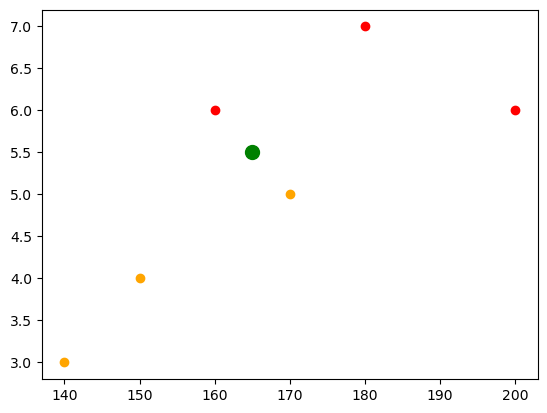

In [17]:
for index, i in df.iterrows():    
    if i['label'] == 'Apple':
        plt.scatter(i['weight'], i['sweetness'], color='red')
    else:
        plt.scatter(i['weight'], i['sweetness'], color='orange')
        
plt.scatter(165, 5.5, color='green', s=100)

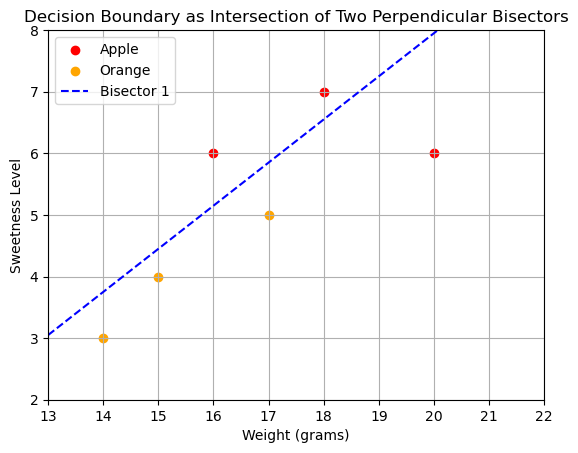

In [18]:
# Sample data
fruits = np.array([
    [18, 7, 'Apple'],
    [20, 6, 'Apple'],
    [15, 4, 'Orange'],
    [17, 5, 'Orange'],
    [16, 6, 'Apple'],
    [14, 3, 'Orange']
])

# Separate the fruits by class
apples = fruits[fruits[:, 2] == 'Apple'][:, :2].astype(float)
oranges = fruits[fruits[:, 2] == 'Orange'][:, :2].astype(float)

# Find the closest pairs
distances = []
for apple in apples:
    for orange in oranges:
        distance = np.linalg.norm(apple - orange)
        distances.append((distance, apple, orange))

# Sort by distance and take the two closest pairs
distances.sort(key=lambda x: x[0])
closest_pairs = distances[:2]

# Function to calculate the perpendicular bisector
def perpendicular_bisector(point1, point2):
    midpoint = (point1 + point2) / 2
    slope = (point2[1] - point1[1]) / (point2[0] - point1[0]) if point2[0] != point1[0] else float('inf')
    perpendicular_slope = -1 / slope if slope != 0 else float('inf')
    return midpoint, perpendicular_slope

# Get the bisectors for the two closest pairs
bisectors = []
for _, apple, orange in closest_pairs:
    midpoint, perp_slope = perpendicular_bisector(apple, orange)
    bisectors.append((midpoint, perp_slope))

# Calculate the intersection of the two bisectors
midpoint1, slope1 = bisectors[0]
midpoint2, slope2 = bisectors[1]
slope1-=0.3
# Line equations for the bisectors
def line_eq(x, midpoint, slope):
    return slope * (x - midpoint[0]) + midpoint[1]

# Set up x values for the lines
x_values1 = np.linspace(13, 22, 10)
# x_values2 = np.linspace(17.2, 22, 10)

# Calculate y values for the two bisectors
y_values1 = line_eq(x_values1, midpoint1, slope1)
# y_values2 = line_eq(x_values2, midpoint2, slope2)

# Find intersection point
# A = np.array([[1, -slope1], [1, -slope2]])
# B = np.array([midpoint1[1] + slope1 * midpoint1[0], midpoint2[1] + slope2 * midpoint2[0]])
# intersection = np.linalg.solve(A, B)
# # Plotting
# plt.figure(figsize=(8, 8))

# Scatter plot of the fruits
plt.scatter(apples[:, 0], apples[:, 1], color='red', label='Apple')
plt.scatter(oranges[:, 0], oranges[:, 1], color='orange', label='Orange')

# Plot the decision boundaries (perpendicular bisectors)
plt.plot(x_values1, y_values1, color='blue', linestyle='--', label='Bisector 1')
# plt.plot(x_values2, y_values2, color='green', linestyle='--', label='Bisector 2')

# Plot the intersection point
# plt.scatter(intersection[0], intersection[1], color='purple', s=100, label='Intersection Point')

plt.title('Decision Boundary as Intersection of Two Perpendicular Bisectors')
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.legend()
plt.xlim(13, 22)
plt.ylim(2, 8)
plt.grid()
plt.show()

Q1-B

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances

X = np.array([[180, 7],
              [200, 6],
              [150, 4],
              [170, 5],
              [160, 6],
              [140, 3]])
y = np.array(['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange'])

new_fruit = np.array([[165, 5.5]])

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)
predicted_label = knn.predict(new_fruit)

distances = {
    'Euclidean': pairwise_distances(new_fruit, X, metric='euclidean')[0],
    'Manhattan': pairwise_distances(new_fruit, X, metric='manhattan')[0],
    'Minkowski (p=3)': pairwise_distances(new_fruit, X, metric='minkowski', p=3)[0],
}

print(f"Predicted label for the new fruit: {predicted_label[0]}")
for metric, dist in distances.items():
    print(f"{metric} distances: {dist}")

Predicted label for the new fruit: Orange
Euclidean distances: [15.07481343 35.00357125 15.07481343  5.02493781  5.02493781 25.12468905]
Manhattan distances: [16.5 35.5 16.5  5.5  5.5 27.5]
Minkowski (p=3) distances: [15.00499833 35.00003401 15.00499833  5.00166611  5.00166611 25.00833056]


Q2-A

In [20]:
data = np.array([
    [30, 'High', 'High', 'Sick'],
    [45, 'Low', 'Normal', 'Healthy'],
    [50, 'High', 'High', 'Sick'],
    [35, 'Low', 'Normal', 'Healthy'],
    [60, 'High', 'High', 'Sick'],
    [55, 'Low', 'Normal', 'Healthy'],
    [40, 'High', 'High', 'Sick'],
    [25, 'Low', 'Normal', 'Healthy'],
    [65, 'High', 'High', 'Sick'],
    [45, 'Low', 'Normal', 'Healthy']
])

def entropy(target_column):
    labels, counts = np.unique(target_column, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

diagnosis_column = data[:, 3]
initial_entropy = entropy(diagnosis_column)
print(f"Entropy of Diagnosis: {initial_entropy:.3f}")

Entropy of Diagnosis: 1.000


In [21]:
def information_gain(data, feature_index, target_index):

    total_entropy = entropy(data[:, target_index])
    
    feature_values, feature_counts = np.unique(data[:, feature_index], return_counts=True)
    
    weighted_entropy = 0
    for value, count in zip(feature_values, feature_counts):
        subset = data[data[:, feature_index] == value]
        weighted_entropy += (count / np.sum(feature_counts)) * entropy(subset[:, target_index])
    
    return total_entropy - weighted_entropy

features = [0, 1, 2]  
info_gains = [information_gain(data, f, 3) for f in features]

for i, gain in enumerate(info_gains):
    print(f"Information Gain for feature {i} ({['Age', 'Blood Pressure', 'Cholesterol'][i]}): {gain:.3f}")

Information Gain for feature 0 (Age): 1.000
Information Gain for feature 1 (Blood Pressure): 1.000
Information Gain for feature 2 (Cholesterol): 1.000


In [22]:
root_feature_index = np.argmax(info_gains)
root_feature_name = ['Age', 'Blood Pressure', 'Cholesterol'][root_feature_index]
print(f"Root feature chosen: {root_feature_name}")

Root feature chosen: Age


In [23]:
def predict(age, bp, chol):
    if bp == 'High':
        return 'Sick'  
    else:
        if age <= 45:
            return 'Healthy'
        else:
            return 'Sick'

prediction = predict(50, 'Low', 'Normal')
print(f"Prediction for a 50-year-old patient with low BP and normal cholesterol: {prediction}")

Prediction for a 50-year-old patient with low BP and normal cholesterol: Sick


Q2-B

Prediction for a 50-year-old patient with low BP and normal cholesterol: Healthy


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


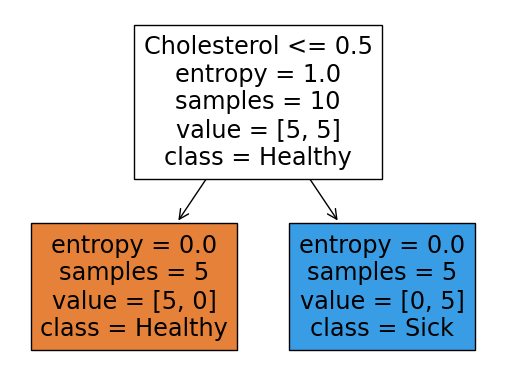

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

data_dict = {
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data_dict)

df['Blood Pressure'] = df['Blood Pressure'].map({'High': 1, 'Low': 0})
df['Cholesterol'] = df['Cholesterol'].map({'High': 1, 'Normal': 0})
df['Diagnosis'] = df['Diagnosis'].map({'Sick': 1, 'Healthy': 0})

X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']

clf = DecisionTreeClassifier(criterion='entropy') 
clf.fit(X, y)

tree.plot_tree(clf, feature_names=X.columns, class_names=['Healthy', 'Sick'], filled=True)

new_patient = np.array([[50, 0, 0]])  
prediction = clf.predict(new_patient)

print(f"Prediction for a 50-year-old patient with low BP and normal cholesterol: {'Healthy' if prediction[0] == 0 else 'Sick'}")